<img src="./images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Entanglement revisited*_ 

The latest version of this notebook is available on https://github.com/IBM/qiskit-sdk-py/tree/master/scripts.

For more information about how to use the Quantum Experience consult the [Quantum Experience tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0) or check-out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Antonio Córcoles

## Entanglement

In [superposition and entanglement](scripts/superposition_and_entanglement.ipynb) we introduced you to the concept of entanglement. We made the quantum state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ and showed that (up to experimental noise) the system has perfect correlations in both the computation basis and the superpostion basis. This means that if $q_0$ is measured in state $|0\rangle$ then we know $q_1$ is in this state, and furthermore if $q_0$ is measured in state $|+\rangle$ then we know $q_1$ is in this state.

To understand the implications of this in a little bit more detail lets introduce the concept of an observable. An observable is a Hermitian matrix where the real eigenvalues represent the outcome of the experiment and the eigenvectors are the states the system is projected in under measurement. That is $ A$ is given by
  

$$  A = \sum_j a_j|a_j\rangle\langle a_j|$$ 

where $|a_j\rangle$ is the eigenvector of the observable with result $a_j$. This expectation value of this observable is given by 

$$\langle  A \rangle  = \sum_j a_j |\langle \psi  |a_j\rangle|^2  = \sum_j a_j \mathrm{Pr}(a_j|\psi)$$

and we see there is the standard relationship between average (expectation value) and probability. 

For a two qubit system the following important two-outcome ($\pm1$) single qubit observables are 

$$ Z= |0\rangle\langle 0| - |1\rangle\langle 1|$$ 
$$ X= |+\rangle\langle +| - |-\rangle\langle -|$$ 

which can be extended to the two-qubit space to give 

$$\langle  I\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) +  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  I\rangle =\mathrm{Pr}(00|\psi) + \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)+ \mathrm{Pr}(11|\psi)$$ 

$$\langle  I\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) +  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  I\rangle =\mathrm{Pr}(++|\psi) + \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)+ \mathrm{Pr}(--|\psi)$$ 


$$\langle  Z\otimes  X\rangle =\mathrm{Pr}(0+|\psi) - \mathrm{Pr}(0-|\psi) -  \mathrm{Pr}(1+|\psi)+ \mathrm{Pr}(1-|\psi)$$ 
$$\langle  X\otimes  Z\rangle =\mathrm{Pr}(+0|\psi) - \mathrm{Pr}(+1|\psi) -  \mathrm{Pr}(-0|\psi)+ \mathrm{Pr}(-1|\psi)$$ 

In [1]:
#Checking the version of PYTHON we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
#usefull additional packages 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.linalg
%matplotlib inline
import time

#importing the QX and QISKit 
from IBMQuantumExperience import IBMQuantumExperience
import sys
sys.path.append("..")
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.extensions.standard import x, h, cx, u3

#some usefull functions for running a program, plotting, and getting the data
from qhelpers.misc import run_program
from qhelpers.misc import program_to_text
from qhelpers.misc import combine_jobs
from qhelpers.misc import get_data
from qhelpers.basicplotter import plot_histogram
from qhelpers.misc import average_data

#Set up the API to communitcate to the QX
import Qconfig
api = IBMQuantumExperience.IBMQuantumExperience(Qconfig.APItoken, Qconfig.config)



Recall to make the Bell state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ from the initial state $|00\rangle$, the quantum circuit first applies a Hadmard on $q_0$ and then a CNOT from $q_0$ to $q_1$. On the Quantum Experience this is done by using the script for measurement of the above expectation values we have to run four different experiments with measurements in the standard basis, superposition basis, and a combination of both.

In [2]:
device = 'real' # the device to run on
shots = 1024    #the number of shots in the experiment. 

#quantum circuit to make bell state 
q = QuantumRegister("q", 2)
c = ClassicalRegister("c", 2)
bell = QuantumCircuit(q, c)
bell.h(q[0])
bell.cx(q[0],q[1])

# quantum circuit to measure q in standard basis 
q1 = QuantumRegister("q", 2)
c1 = ClassicalRegister("c", 2)
measureZZ = QuantumCircuit(q1, c1)
measureZZ.measure(q1[0], c1[0])
measureZZ.measure(q1[1], c1[1])

# quantum circuit to measure q in superposition basis 
q2 = QuantumRegister("q", 2)
c2 = ClassicalRegister("c", 2)
measureXX = QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])

# quantum circuit to measure ZX
q3 = QuantumRegister("q", 2)
c3 = ClassicalRegister("c", 2)
measureZX = QuantumCircuit(q3, c3)
measureZX.h(q3[0])
measureZX.measure(q3[0], c3[0])
measureZX.measure(q3[1], c3[1])

# quantum circuit to measure XZ
q4 = QuantumRegister("q", 2)
c4 = ClassicalRegister("c", 2)
measureXZ = QuantumCircuit(q4, c4)
measureXZ.h(q4[1])
measureXZ.measure(q4[0], c4[0])
measureXZ.measure(q4[1], c4[1])

program = [bell+measureZZ, bell+measureZX, bell+measureXX, bell+measureXZ]

print(program_to_text(program))
out = run_program(program,api,device,shots,max_credits=3)
jobids=[out['id']]
results=combine_jobs(jobids, api, wait=20, timeout=240)  

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
measure q[1] -> c[1];
measure q[0] -> c[0];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u2(0.0,3.141592653589793) q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u2(0.0,3.141592653589793) q[1];
measure q[1] -> c[1];
u2(0.0,3.141592653589793) q[0];
measure q[0] -> c[0];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u2(0.0,3.141592653589793) q[1];
measure q[1] -> c[1];
measure q[0] -> c[0];



status = {'RUNNING': 1} (0 seconds)
status = {'COMPLETED': 1} (20 seconds)


In [3]:
obsevableIZ ={'00000': 1, '00001': -1, '00010': 1, '00011': -1}
obsevableZI ={'00000': 1, '00001': 1, '00010': -1, '00011': -1}
obsevableZZ ={'00000': 1, '00001': -1, '00010': -1, '00011': 1}

obsevableIZ_ideal ={'00': 1, '01': -1, '10': 1, '11': -1}
obsevableZI_ideal ={'00': 1, '01': 1, '10': -1, '11': -1}
obsevableZZ_ideal ={'00': 1, '01': -1, '10': -1, '11': 1}

In [4]:
print("IZ = " + str(average_data(get_data(results,0),obsevableIZ)))
print("ZI = " + str(average_data(get_data(results,0),obsevableZI)))
print("ZZ = " + str(average_data(get_data(results,0),obsevableZZ)))

print("IX = " + str(average_data(get_data(results,2),obsevableIZ)))
print("XI = " + str(average_data(get_data(results,2),obsevableZI)))
print("XX = " + str(average_data(get_data(results,2),obsevableZZ)))

print("ZX = " + str(average_data(get_data(results,1),obsevableZZ)))
print("XZ = " + str(average_data(get_data(results,3),obsevableZZ)))

IZ = -0.01953125
ZI = 0.009765625
ZZ = 0.771484375
IX = 0.021484375
XI = 0.013671875
XX = 0.75
ZX = -0.021484375
XZ = 0.015625


Here we see that for the state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ that within experimental error expectation values are

\begin{tabular}{ l c r }
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 9 \\
\end{tabular}

## CHSH inequality 

In classical physics there are phenomena that can appear random to an observer but are far from being so. For example, the single toss of a coin. Assuming a fair coin, of course, will that give a random outcome? It may appear so. But the apparent randomness stems simply from the fact that we cannot easily measure everything related to the toss of the coin: speed, angular momentum, ambient conditions ... with enough accuracy. These variables are 'hidden' to the classical observer. From the beginnings of quantum mechanics, some people pondered that the randomness inherent to the quantum theory might equally be due to hidden variables. This was for a while a very hot topic of discussion in quantum mechanics.

In 1964, John Stewart Bell proposed a theorem that suggests that there are no hidden variables in quantum mechanics. It would not be crazy to state that Bell's theorem might be one of the most profound discoveries ever made in history of science. At the core of Bell's theorem is the famous Bell inequality. Here, we'll use a refined version of this inequality (known as the CHSH inequality, derived by John Clauser, Michael Horne, Abner Shimony, and Richard Holt in 1969) to demonstrate Bell's proposal 

In the CHSH inequality we measure the correlator of the four observables: $A$ and $A'$ on $q_0$ and $B$ and $B'$ on $q_1$ which have eigenvalues $\pm 1$. The CHSH inequality says that no local hidden variable theory can have  

$$|C|>2$$ 

where 

$$C = \langle B\otimes A\rangle + \langle B\otimes A'\rangle+\langle B'\otimes A'\rangle-\langle B'\otimes A\rangle$$


 
* _Locality_: No information can travel faster than the speed of light. There is a hidden variable $\lambda$ that defines all the correlations so that  $$\langle A\otimes B\rangle = \sum_\lambda P(\lambda) A(\lambda) B(\lambda)$$ and $C$ becomes 
$$C = \sum_\lambda P(\lambda) \{ B(\lambda) [ A(\lambda)+A'(\lambda)] + B'(\lambda) [ A'(\lambda)-A(\lambda)]$$
                      
* _Realism_: All observables have a definite value independent of the measurement (+1 or -1). This implies that either $[A(\lambda)+A'(\lambda)]=2$ (or 0) while $[A'(\lambda)-A(\lambda)]=0$ (or 2) respectively. That is, $|C|=2$, and noise will only make this smaller. 
 
If we measure a number greater than 2 then the above assumptions must not be valid, and this is one of those astonishing counterintuitive ideas one must accept in the quantum world.

For simplicity we choose these observables to be 

 $$C = \langle Z\otimes Z\rangle + \langle Z\otimes X\rangle+\langle X\otimes X\rangle-\langle X\otimes Z\rangle$$

Z is measured in the computational basis and X in the superposition basis ($H$ is applied before measurement) and the input state $$|\psi(\theta)\rangle = I\otimes Y(\theta)\frac{|00\rangle + |11\rangle}{\sqrt(2)}$$ is swept vs $\theta$. 
 
Note that the following demonstration of CHSH is not loophole-free. 

In [8]:
CHSH = lambda x : x[0]+x[1]+x[2]-x[3]

In [5]:
program = []
xdata=[]

program_end = [measureZZ, measureZX, measureXX, measureXZ]

for jj in range(30):
    theta = 2.0*np.pi*jj/30
    q5 = QuantumRegister("q", 2)
    c5 = ClassicalRegister("c", 2)
    bell_middle = QuantumCircuit(q5, c5)
    bell_middle.u3(theta,0,0,q5[0])
    for i in range(4):
        program.append(bell+bell_middle+program_end[i])
    xdata.append(theta)
    


In [6]:
print(program_to_text(program[0:8]))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u3(0.0,0.0,0.0) q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u3(0.0,0.0,0.0) q[0];
u2(0.0,3.141592653589793) q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u3(0.0,0.0,0.0) q[0];
u2(0.0,3.141592653589793) q[0];
measure q[0] -> c[0];
u2(0.0,3.141592653589793) q[1];
measure q[1] -> c[1];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u2(0.0,3.141592653589793) q[1];
measure q[1] -> c[1];
u3(0.0,0.0,0.0) q[0];
measure q[0] -> c[0];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u2(0.0,3.141592653589793) q[0];
cx q[0],q[1];
u3(0.20943951023932,0.0,0.0) q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [23]:
device = 'simulator'
shots = 1024


program_list=[program[0:40],program[40:80],program[80:120]]

jobids = []
for p in program_list:
    run_program(p,api,device,shots,max_credits=3)
    jobids.append(out['id'])
    
r=combine_jobs(jobids, api, wait=5, timeout=60)

CHSH_data_sim = []
for j in range(0,len(r['qasms']),4):
    temp=[]
    temp.append(average_data(get_data(r,j+0),obsevableZZ_ideal))
    temp.append(average_data(get_data(r,j+1),obsevableZZ_ideal))
    temp.append(average_data(get_data(r,j+2),obsevableZZ_ideal))
    temp.append(average_data(get_data(r,j+3),obsevableZZ_ideal))
    CHSH_data_sim.append(CHSH(temp))

status = {'COMPLETED': 3} (0 seconds)


In [24]:
len(r['qasms'])

120

In [25]:
device = 'real'
shots = 1024

program = []
xdata2=[]

for jj in range(10):
    theta = 2.0*np.pi*jj/10
    q5 = QuantumRegister("q", 2)
    c5 = ClassicalRegister("c", 2)
    bell_middle = QuantumCircuit(q5, c5)
    bell_middle.u3(theta,0,0,q5[0])
    for i in range(4):
        program.append(bell+bell_middle+program_end[i])
    xdata2.append(theta)


out = run_program(program,api,device,shots,max_credits=3)
jobids=[out['id']]
r=combine_jobs(jobids, api, wait=20, timeout=240)  

CHSH_data_real = []
for j in range(0, len(r['qasms']), 4):
    temp=[]
    temp.append(average_data(get_data(r,j+0),obsevableZZ))
    temp.append(average_data(get_data(r,j+1),obsevableZZ))
    temp.append(average_data(get_data(r,j+2),obsevableZZ))
    temp.append(average_data(get_data(r,j+3),obsevableZZ))
    CHSH_data_real.append(CHSH(temp))

status = {'RUNNING': 1} (0 seconds)
status = {'RUNNING': 1} (20 seconds)
status = {'RUNNING': 1} (40 seconds)
status = {'COMPLETED': 1} (60 seconds)


The graph created by running the next cell compares the simulated data (sinusoidal line) and the data from the real experiment. The graph also gives lines at $\pm 2$ for reference.

Here is the saved CHSH data. 

In [26]:
print(len(xdata))
print(len(CHSH_data_sim))
print(len(xdata2))
print(len(CHSH_data_real))

30
30
10
10


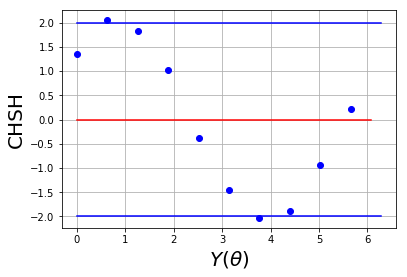

In [27]:
plt.plot(xdata, CHSH_data_sim, 'r-', xdata2, CHSH_data_real, 'bo')
plt.plot([0, 2*np.pi], [2, 2], 'b-')
plt.plot([0, 2*np.pi], [-2, -2], 'b-')
plt.grid()
plt.ylabel('CHSH', fontsize=20)
plt.xlabel(r'$Y(\theta)$', fontsize=20)
plt.show()

In [28]:
print(CHSH_data_real)

[1.34765625, 2.05078125, 1.8203125, 1.02734375, -0.373046875, -1.451171875, -2.029296875, -1.87890625, -0.9375, 0.224609375]


Despite the presence of loopholes in our demonstration, we can see that this experiment is compatible with quantum mechanics as a theory with no local hidden variables.